<a href="https://colab.research.google.com/github/carol-furtado/WEC-competiton/blob/main/WEC_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Predicting Blueberry Yield Using Supervised Regression Models – A Kaggle ML League Challenge

In [10]:
#first import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


#####Loading the competion data into the notebook

In [11]:
from google.colab import files
files.upload() #upload the downloaded kaggle.json file when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carolmikhail","key":"498ab6090070f5847cbaf77287adb2ce"}'}

In [12]:
#setting permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
#downloading the dataset
!kaggle competitions download -c ml-league-supervised-learning-competition

ml-league-supervised-learning-competition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
#unzipping the file
!unzip ml-league-supervised-learning-competition.zip -d data/

Archive:  ml-league-supervised-learning-competition.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


#####Applying certain simple functions on the data to learn more about it

In [46]:
#loading the file
sample_train_data=pd.read_csv('data/train.csv')
sample_test_data=pd.read_csv('data/test.csv')

In [47]:
#displaying the first five rows of training dataset
sample_train_data.head()


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,683.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.383582,0.399556,30.546306,3923.90628
1,1,330.0,12.5,0.25,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.480073,0.448973,35.598217,5596.22636
2,2,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.594206,0.495898,41.059194,7406.90248
3,3,293.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.486486,39.773462,7270.31832
4,4,343.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.532304,0.460322,37.209554,6132.99793


In [48]:
#displaying first five rows of testing dataset
sample_test_data.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,604.0,25.0,0.50,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.476808,0.439423,34.653509
1,15001,568.0,25.0,0.50,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.509158,0.408789,31.798351
2,15002,376.0,12.5,0.25,0.38,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.473994,0.436043,34.629764
3,15003,441.0,25.0,0.25,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.378528,27.442427
4,15004,14.0,37.5,0.75,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.340822,0.377915,28.135899


In [40]:
#displaying the last 5 rows of training dataset
sample_train_data.tail()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
14995,14995,58.0,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.385022,0.372179,29.248678,4016.36160
14996,14996,340.0,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.620392,0.528322,43.242047,8013.62631
14997,14997,722.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.619888,0.512639,45.069192,8413.65966
14998,14998,367.0,12.5,0.25,0.38,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.582491,0.492820,41.176421,7183.10038
14999,14999,167.0,12.5,0.25,0.25,0.38,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.506190,0.455614,36.148782,5747.56017


In [49]:
#displaying the last 5 rows of testing dataset
sample_test_data.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,604.0,25.0,0.50,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.476808,0.439423,34.653509
1,15001,568.0,25.0,0.50,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.509158,0.408789,31.798351
2,15002,376.0,12.5,0.25,0.38,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.473994,0.436043,34.629764
3,15003,441.0,25.0,0.25,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.378528,27.442427
4,15004,14.0,37.5,0.75,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.340822,0.377915,28.135899


In [56]:
#finding out whether there are any null values in the training dataset
sample_train_data.isnull().sum()

,0
id,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0


In [57]:
#finding out whether there are any null values in the testing dataset
sample_test_data.isnull().sum()

,0
id,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0


In [42]:
#finding number of data points and number of features in training data
sample_train_data.shape

(15000, 19)

In [58]:
#finding number of data points and number of features in testing data
sample_test_data.shape

(10000, 18)

In [43]:
#obtaining some information on the training dataset
sample_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [59]:
#obtaining some information on the testing dataset
sample_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   Row#                  10000 non-null  float64
 2   clonesize             10000 non-null  float64
 3   honeybee              10000 non-null  float64
 4   bumbles               10000 non-null  float64
 5   andrena               10000 non-null  float64
 6   osmia                 10000 non-null  float64
 7   MaxOfUpperTRange      10000 non-null  float64
 8   MinOfUpperTRange      10000 non-null  float64
 9   AverageOfUpperTRange  10000 non-null  float64
 10  MaxOfLowerTRange      10000 non-null  float64
 11  MinOfLowerTRange      10000 non-null  float64
 12  AverageOfLowerTRange  10000 non-null  float64
 13  RainingDays           10000 non-null  float64
 14  AverageRainingDays    10000 non-null  float64
 15  fruitset            

#####Understanding the correlation between the features of the datset


<Axes: >

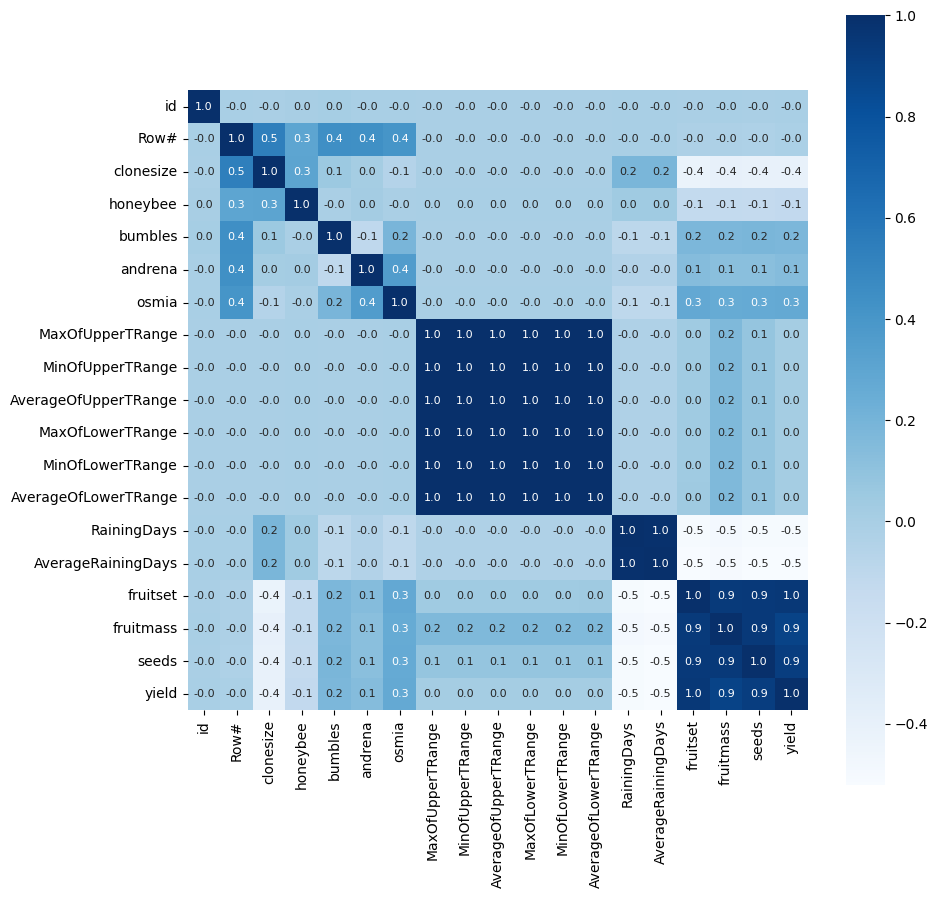

In [60]:

correlation_train_data=sample_train_data.corr()
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation_train_data,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#####Model Training using XGBoost Regressor